<a href="https://colab.research.google.com/github/collinsbett1/Hass-Consluting-House-Pricing/blob/main/Updated_Hass_Consulting_Company_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company: House Pricing

## 1. Defining the question.


### a) Specifying the Data Analytic Question.
> Using information collected over the past few months on real estate properties, what factors affect housing prices?

### b) Defining the Metric for Success.

> The analysis will be declared a success once when the following requirements have been satisfied;
1. Found the factors affecting housing prices.
2. Created models that can help us predict housing prices given the factors and variables available. These models include;
  * Multiple Linear Regression
  * Quantile Regression
  * Ridge Regression
  * Lasso Regression
  * Elastic Net Regression

### c) Understanding the context.
> As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## 2. Reading the Data.

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import statsmodels.formula.api as smf
# 
# Loading the dataset
df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3. Checking the Data


In [ ]:
# Determining the number of records in our dataset.
df.shape

(21613, 20)

In [ ]:
# Previewing the head of the dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the tail of the dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Description of the numerical data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 4. Tidying the dataset.

In [ ]:
# Identifying the Missing Data
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Checking for duplicates
df.duplicated().value_counts()

False    21610
True         3
dtype: int64

In [ ]:
# Dropping the duplicates
df.drop_duplicates(keep= False, inplace=True)

In [ ]:
#getting the number unique values in each column
df.nunique()

id               21433
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9780
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8688
dtype: int64

In [ ]:
# drop the unnecessary 'n_daily_data_points' column
df.drop(['id'], axis = 1, inplace=True)

In [ ]:
# Saving the cleaned dataset 
df.to_csv("newprices.csv", index=False)
# Reading the new dataset
df1 = pd.read_csv("newprices.csv")
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 5. Exploratory Data Analysis.

### 5.1 Univariate Analysis.

### 5.1.1 Numerical Variables

##### a) Measures of Central Tendancy

In [ ]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#using for loops to get the mean, mode and median for the home score column
numerical_columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: ' + str(df1[column].mean()))
  print(column + ', Mode: ' + str(df1[column].mode()))
  print(column + ', Median: ' + str(df1[column].median()))



price, Mean: 540175.729994909
price, Mode: 0    350000.0
1    450000.0
dtype: float64
price, Median: 450000.0


bedrooms, Mean: 3.370852038691165
bedrooms, Mode: 0    3
dtype: int64
bedrooms, Median: 3.0


bathrooms, Mean: 2.1147197667422595
bathrooms, Mode: 0    2.5
dtype: float64
bathrooms, Median: 2.25


sqft_living, Mean: 2079.8626833896424
sqft_living, Mode: 0    1300
dtype: int64
sqft_living, Median: 1910.0


sqft_lot, Mean: 15109.61244041283
sqft_lot, Mode: 0    5000
dtype: int64
sqft_lot, Median: 7620.0


floors, Mean: 1.4941685564863239
floors, Mode: 0    1.0
dtype: float64
floors, Median: 1.5


waterfront, Mean: 0.00754385152959689
waterfront, Mode: 0    0
dtype: int64
waterfront, Median: 0.0


view, Mean: 0.23409080390614154
view, Mode: 0    0
dtype: int64
view, Median: 0.0


condition, Mean: 3.4094506409959737
condition, Mode: 0    3
dtype: int64
condition, Median: 3.0


grade, Mean: 7.65668533345675
grade, Mode: 0    7
dtype: int64
grade, Median: 7.0


sqft_above, Mean: 

##### b) Measures of Dispersion

In [ ]:
numerical_columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(df1[column].std()))
  print(column + ', Variance: ' + str(df1[column].var()))
  print(column + ', Skewness: ' + str(df1[column].skew()))
  print(column + ', Kurtosis: ' + str(df1[column].kurt()))
  print(column + ', Quartiles: ' + str(df1[column].quantile([0.25,0.5,0.75])))



price, Standard deviation: 367412.9436520466
price, Variance: 134992271163.06197
price, Skewness: 4.021219314159555
price, Kurtosis: 34.512431045542755
price, Quartiles: 0.25    321500.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64


bedrooms, Standard deviation: 0.9301575796215148
bedrooms, Variance: 0.8651931229273547
bedrooms, Skewness: 1.9741875415424084
bedrooms, Kurtosis: 49.05656269435474
bedrooms, Quartiles: 0.25    3.0
0.50    3.0
0.75    4.0
Name: bedrooms, dtype: float64


bathrooms, Standard deviation: 0.7702442560193762
bathrooms, Variance: 0.5932762139308424
bathrooms, Skewness: 0.5112210026478299
bathrooms, Kurtosis: 1.2793718580966322
bathrooms, Quartiles: 0.25    1.75
0.50    2.25
0.75    2.50
Name: bathrooms, dtype: float64


sqft_living, Standard deviation: 918.5597124663008
sqft_living, Variance: 843751.945366173
sqft_living, Skewness: 1.4715089441356635
sqft_living, Kurtosis: 5.24135281655753
sqft_living, Quartiles: 0.25    1423.5
0.50    1910.0


##### Bar Graphs

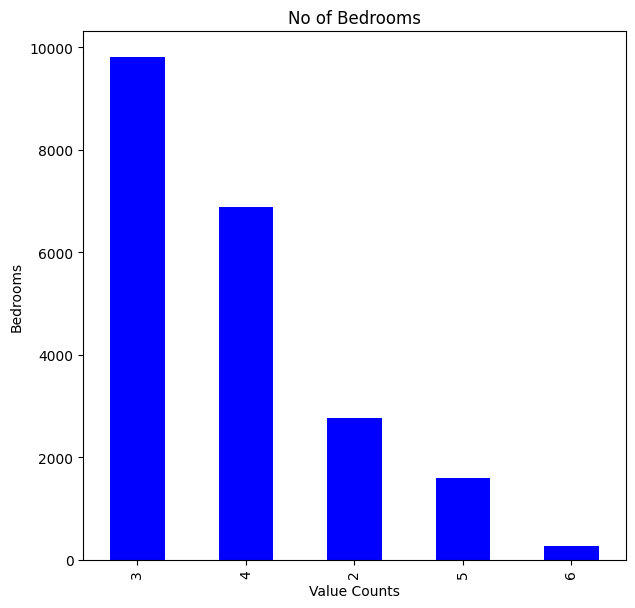

In [ ]:
#creating a bar graph of the number of bedrooms
#
plt.figure(figsize = (7,7), dpi = 100)
df1.bedrooms.value_counts().head()
df1.bedrooms.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of Bedrooms')
plt.xlabel('Value Counts')
plt.ylabel('Bedrooms')
plt.show()

> Most of the houses in the dataset were 3 bedroom houses followed by 4. The least were 6 bedroomed houses.

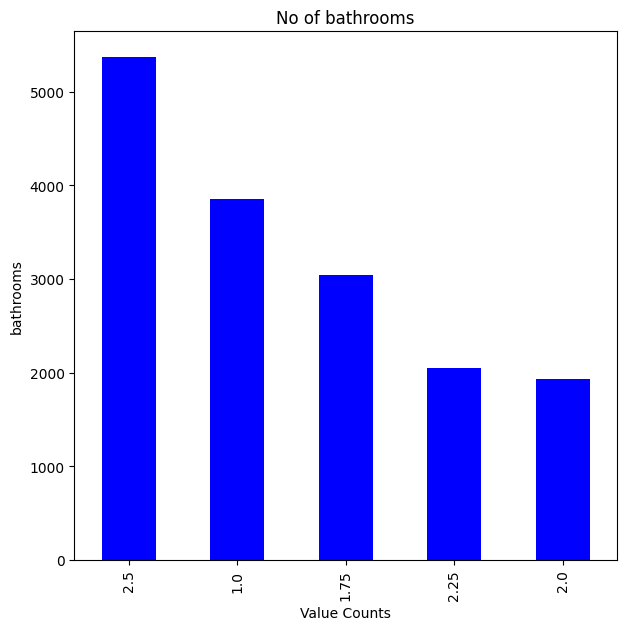

In [ ]:
#creating a bar graph of the number of bathrooms
#
plt.figure(figsize = (7,7), dpi = 100)
df1.bathrooms.value_counts().head()
df1.bathrooms.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of bathrooms')
plt.xlabel('Value Counts')
plt.ylabel('bathrooms')
plt.show()

> Houses with 2.5 bathrooms were the most while those with 2 were the least.

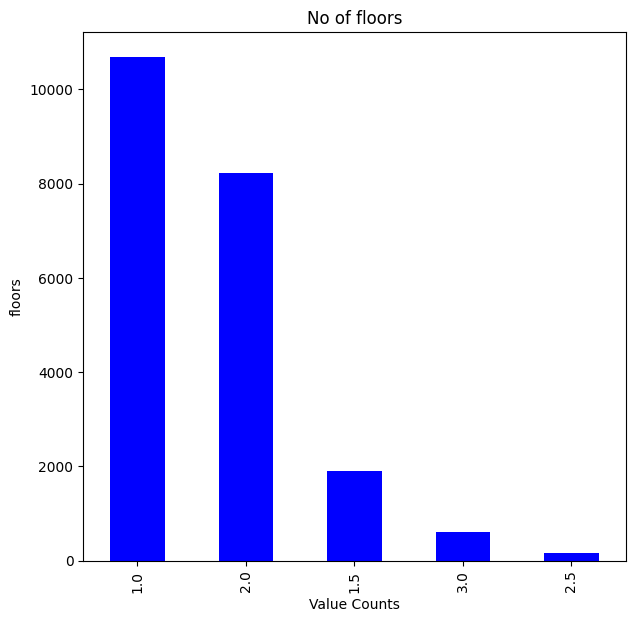

In [ ]:
#creating a bar graph of the floors
plt.figure(figsize = (7,7), dpi = 100)
df1.floors.value_counts().head()
df1.floors.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of floors')
plt.xlabel('Value Counts')
plt.ylabel('floors')
plt.show()

> Most houses had only one floor followed by 2 and lastly 2.5.

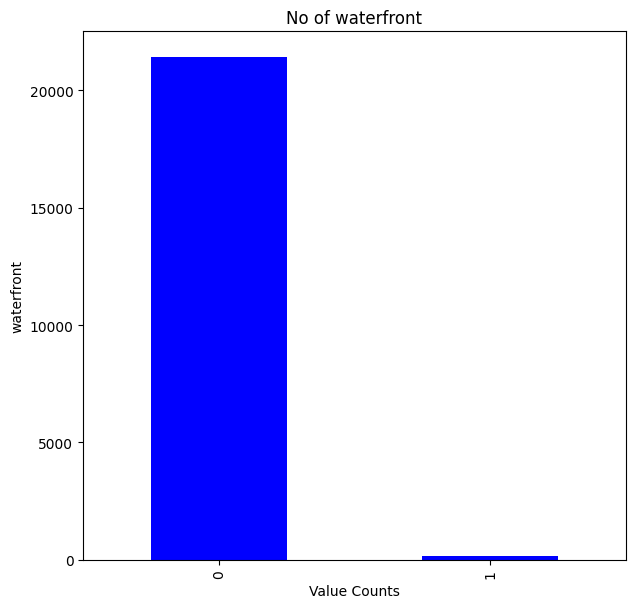

In [ ]:
#creating a bar graph of the houses with waterfronts.
#
plt.figure(figsize = (7,7), dpi = 100)
df1.waterfront.value_counts().head()
df1.waterfront.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of waterfront')
plt.xlabel('Value Counts')
plt.ylabel('waterfront')
plt.show()

> Most houses did not have a waterfront.

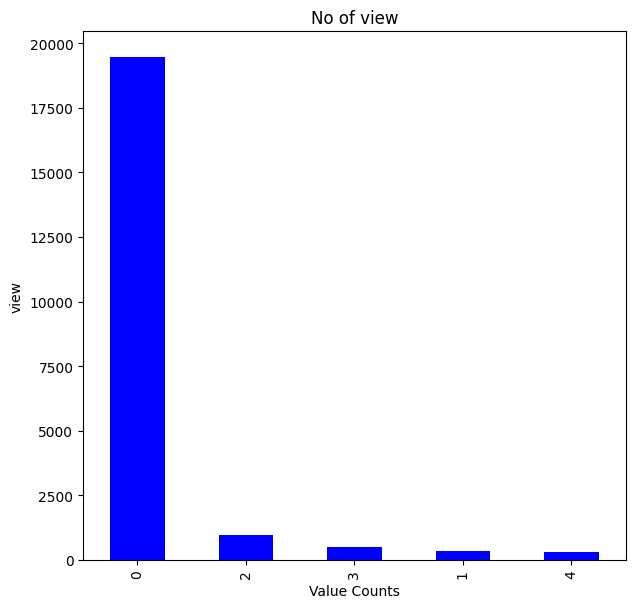

In [ ]:
#creating a bar graph of the view
#
plt.figure(figsize = (7,7), dpi = 100)
df1.view.value_counts().head()
df1.view.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of view')
plt.xlabel('Value Counts')
plt.ylabel('view')
plt.show()

> Most houses did not have a view.

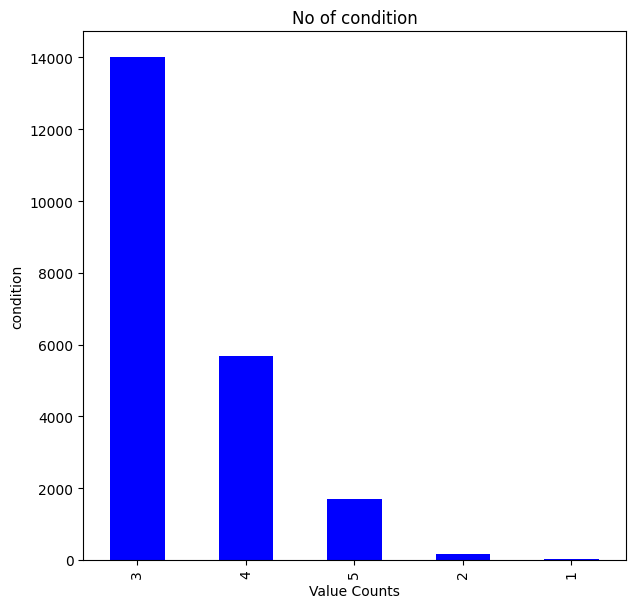

In [ ]:
#creating a bar graph of the condition
plt.figure(figsize = (7,7), dpi = 100)
df1.condition.value_counts().head()
df1.condition.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of condition')
plt.xlabel('Value Counts')
plt.ylabel('condition')
plt.show()

> Most houses had a condition of 3 and very few houses had 1.

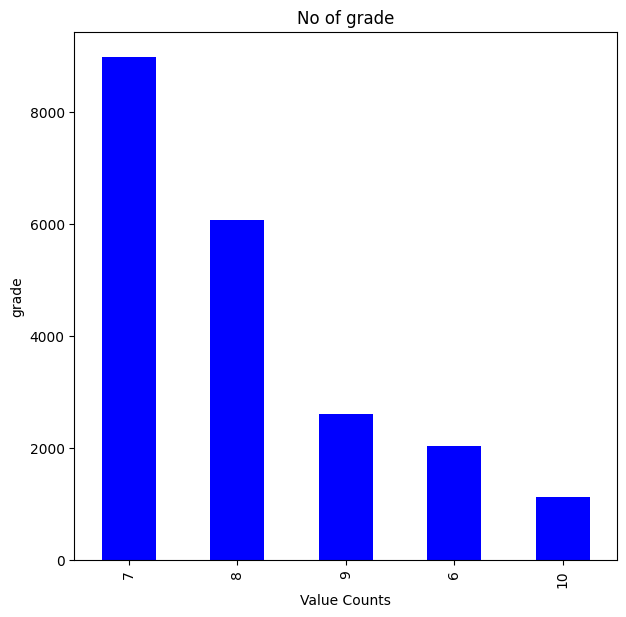

In [ ]:
#creating a bar graph of the condition
plt.figure(figsize = (7,7), dpi = 100)
df1.grade.value_counts().head()
df1.grade.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of grade')
plt.xlabel('Value Counts')
plt.ylabel('grade')
plt.show()

> Grade 7 was the highest classificatioin in grades while 10 was the least.

### 5.2 Bivariate Analysis.

#### 5.2.1 Numerical and Numerical

##### a) Scatter Plot

In [ ]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

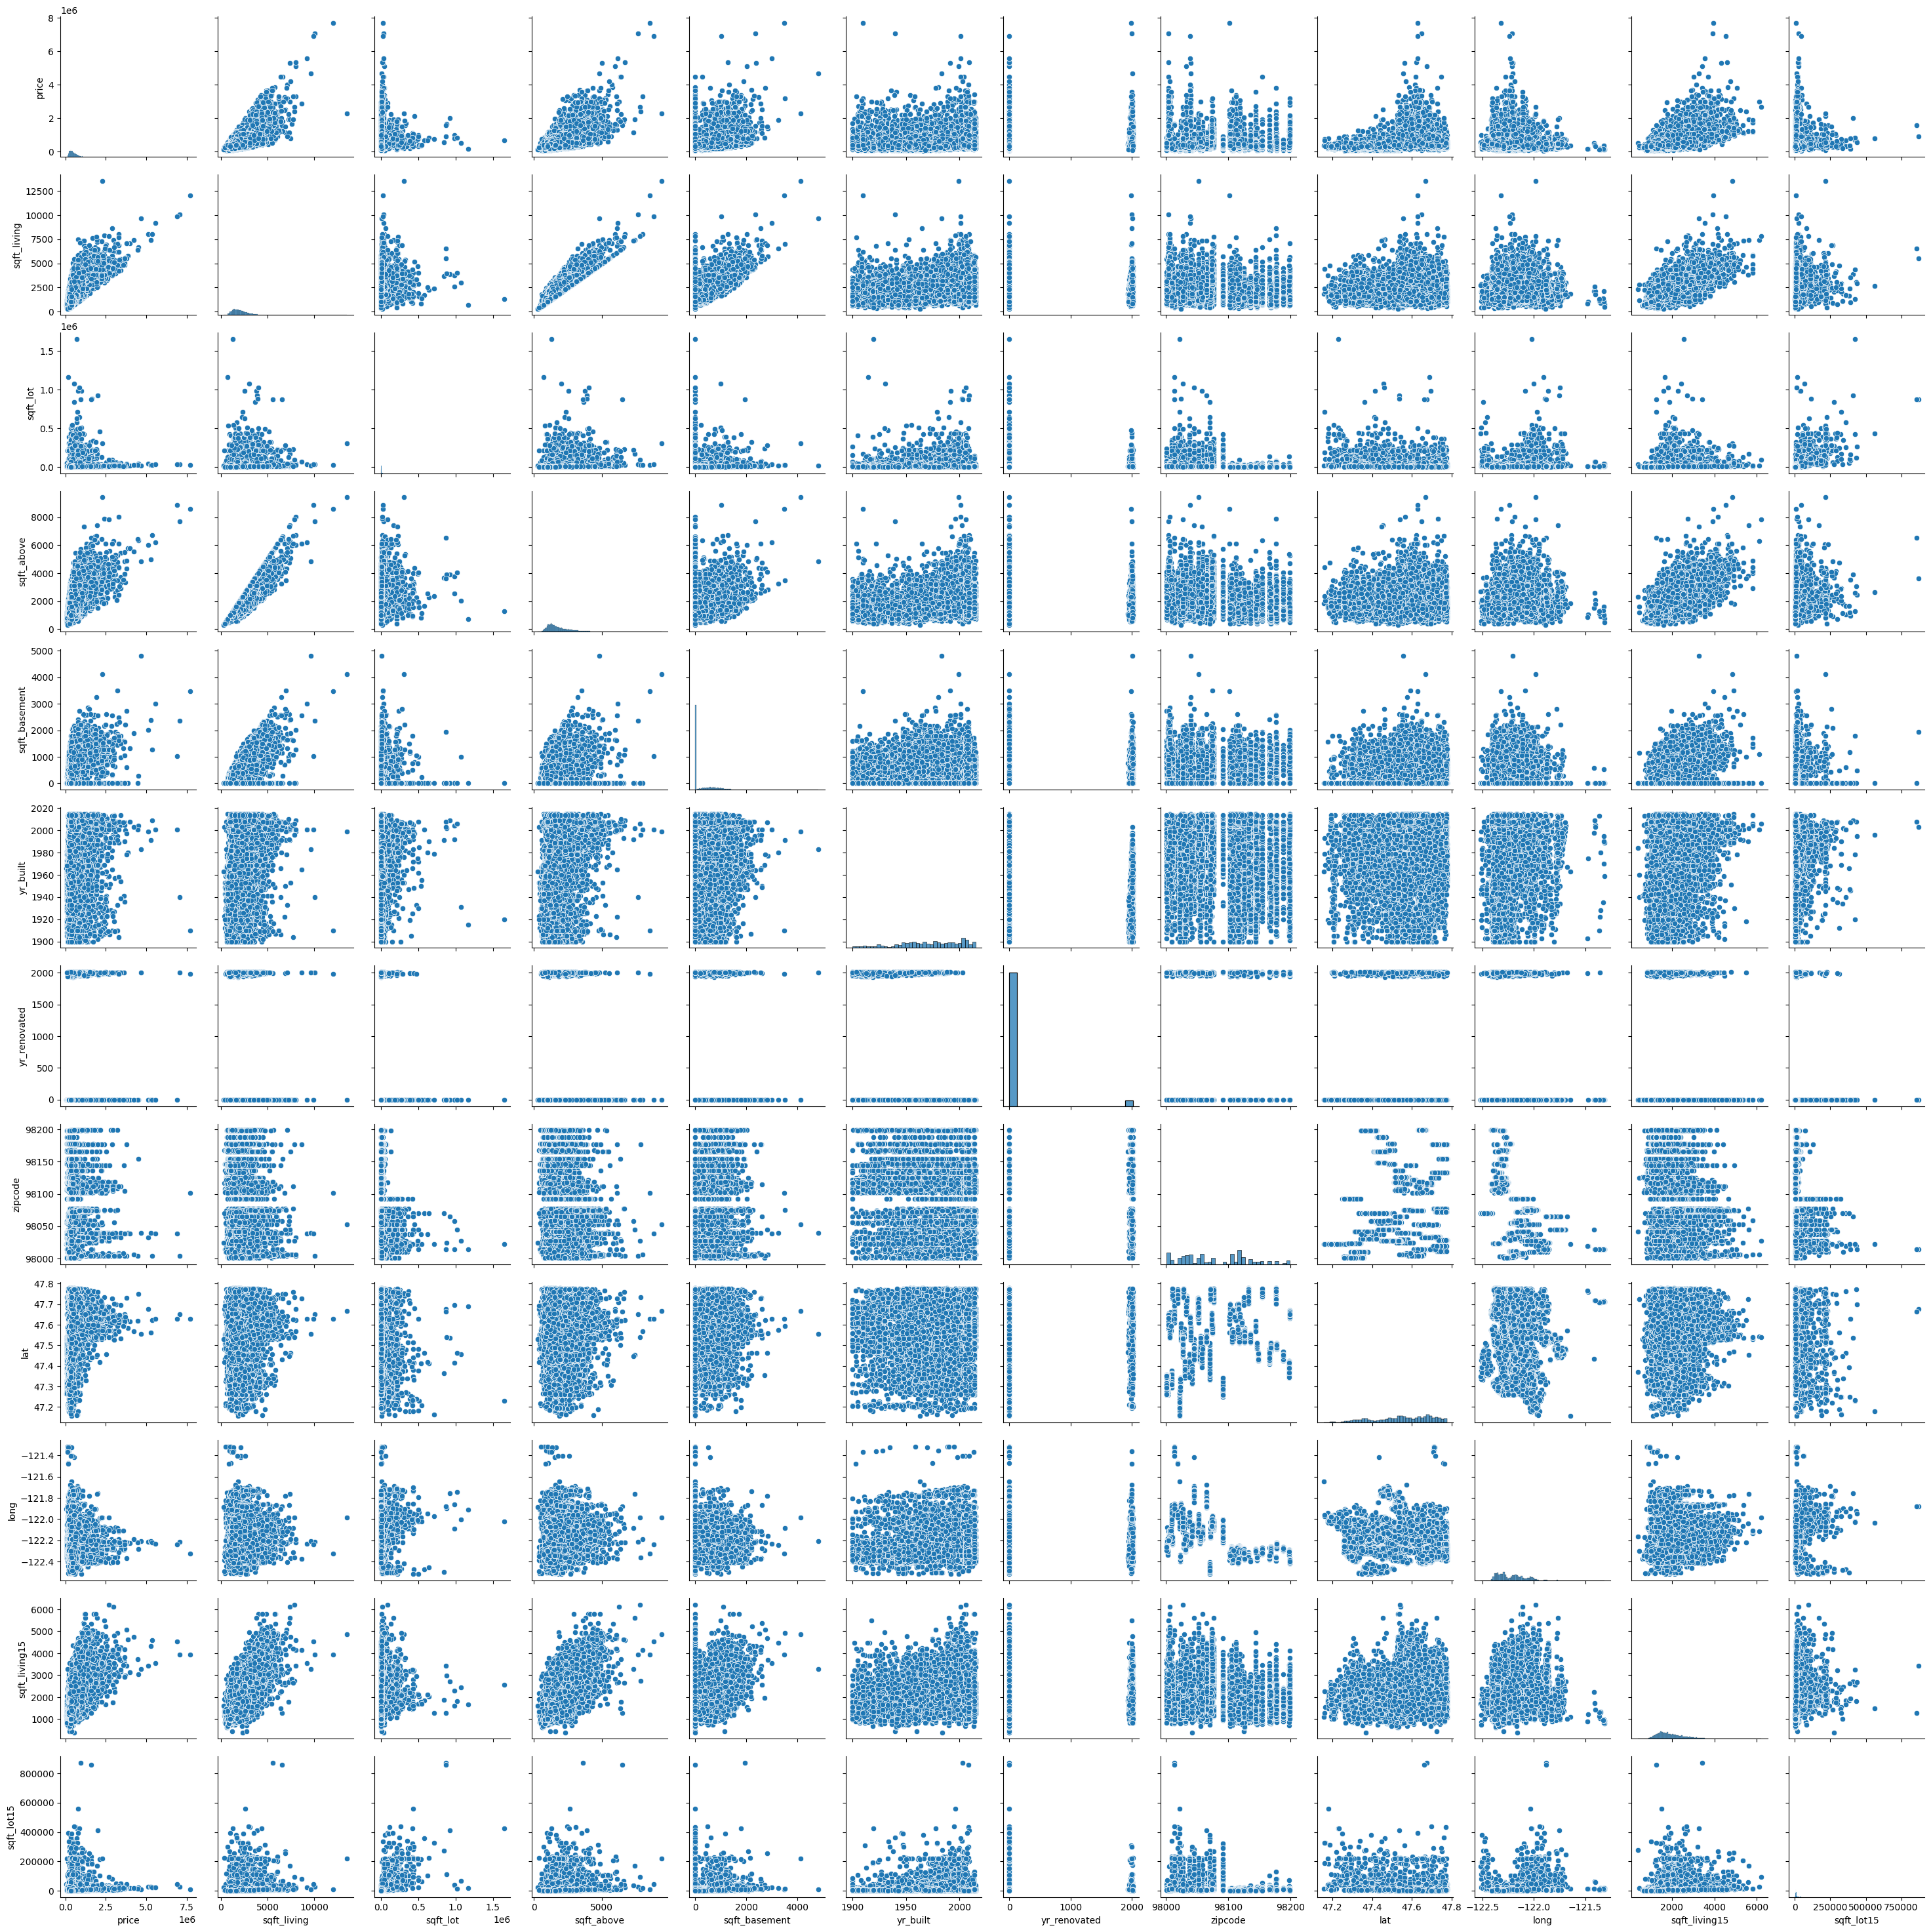

In [ ]:
# Bivariate summaries 
sns.pairplot(df1[['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]);

##### b) Correlation

In [ ]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df1.corr()

corr.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308354,0.525146,0.702048,0.089660,0.256801,0.266333,0.397586,0.036402,0.667494,0.605572,0.323860,0.053979,0.126565,-0.053156,0.306925,0.021564,0.585391,0.082459
bedrooms,0.308354,1.000000,0.515986,0.576677,0.031695,0.175467,-0.006584,0.079335,0.028372,0.357039,0.477637,0.303060,0.154373,0.018550,-0.152773,-0.008975,0.129474,0.391628,0.029221
bathrooms,0.525146,0.515986,1.000000,0.754710,0.087761,0.500685,0.063750,0.188045,-0.124897,0.664997,0.685359,0.283858,0.505974,0.051020,-0.203796,0.024606,0.223052,0.568696,0.087207
sqft_living,0.702048,0.576677,0.754710,1.000000,0.172835,0.353958,0.103822,0.284670,-0.058783,0.762734,0.876604,0.435065,0.318149,0.055265,-0.199440,0.052512,0.240220,0.756419,0.183285
sqft_lot,0.089660,0.031695,0.087761,0.172835,1.000000,-0.005142,0.021598,0.074795,-0.008976,0.113667,0.183541,0.015257,0.053130,0.007712,-0.129648,-0.085677,0.229583,0.144632,0.718555
floors,0.256801,0.175467,0.500685,0.353958,-0.005142,1.000000,0.023724,0.029205,-0.263789,0.458120,0.523864,-0.245642,0.489375,0.005973,-0.058930,0.049572,0.125266,0.279838,-0.011231
waterfront,0.266333,-0.006584,0.063750,0.103822,0.021598,0.023724,1.000000,0.402128,0.016652,0.082795,0.072085,0.080582,-0.026157,0.093016,0.030269,-0.014270,-0.041897,0.086475,0.030700
view,0.397586,0.079335,0.188045,0.284670,0.074795,0.029205,0.402128,1.000000,0.045682,0.251435,0.167669,0.277046,-0.053019,0.102498,0.084849,0.005942,-0.078720,0.280369,0.072580
condition,0.036402,0.028372,-0.124897,-0.058783,-0.008976,-0.263789,0.016652,0.045682,1.000000,-0.144635,-0.158211,0.174037,-0.361278,-0.061106,0.002899,-0.015002,-0.106524,-0.092883,-0.003443
grade,0.667494,0.357039,0.664997,0.762734,0.113667,0.458120,0.082795,0.251435,-0.144635,1.000000,0.755914,0.168494,0.446969,0.014330,-0.184728,0.114088,0.198322,0.713214,0.119283


>* Price had a high correlation with bathrooms, sqft_living, grade, sqft_above and sqft_living15
>* Number of bedrooms has a high correlation with number of bathrooms, sqft_living, number of floors, grade, sqft_above and the year built.

##### c) Bar Charts

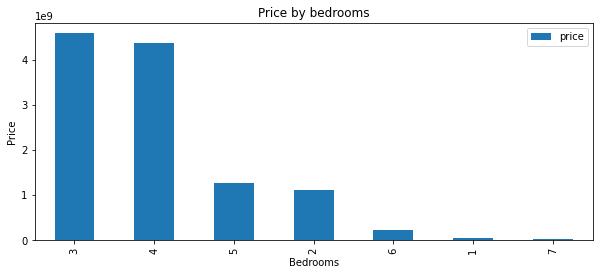

In [ ]:
#checking price by bedrooms
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('bedrooms')['price'].sum().sort_values(ascending=False).head(7).to_frame().plot(kind = "bar", title = "Price by bedrooms");
ax.set(xlabel='Bedrooms', ylabel='Price')
plt.show()

> 3 bedroom houses had the highest prices.

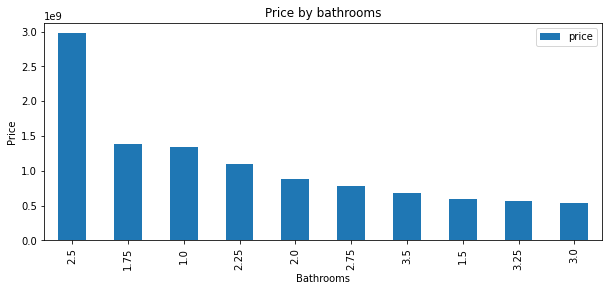

In [ ]:
# checking price by bathrooms
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('bathrooms')['price'].sum().sort_values(ascending=False).head(10).to_frame().plot(kind = "bar", title = "Price by bathrooms");
ax.set(xlabel='Bathrooms', ylabel='Price')
plt.show()

> Houses with 2.5 bathrooms had the highest prices.

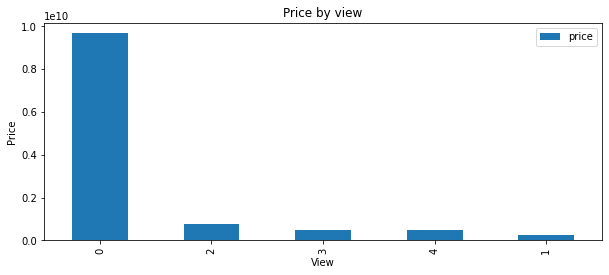

In [ ]:
# checking price by view
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('view')['price'].sum().sort_values(ascending=False).head(10).to_frame().plot(kind = "bar", title = "Price by view");
ax.set(xlabel='View', ylabel='Price')
plt.show()

> Houses with no view had the highest prices.

### 5.3 Multivariate Analysis.

#### LDA

In [ ]:
# Divide the dataset into features and corresponding labels.
X = df1.drop(["price"],axis=1)
y = df1[['price']]

In [ ]:
#checking for unique values of the target variable
np.unique(y)

array([  75000.,   78000.,   80000., ..., 6890000., 7060000., 7700000.])

In [ ]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_. transform(X)

#displaying the coefficients of the reducted columns
lda.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-2.59534931e+00, -6.32337241e+00,  1.83358987e-03, ...,
         1.97069971e+01, -1.01569078e-03,  2.22734589e-05],
       [-8.18529726e-01,  1.00702804e-01, -1.31667525e-03, ...,
         5.16452230e+00,  2.80388477e-03, -4.94038275e-06],
       [-2.89908741e+00,  1.39634770e+00, -9.77499230e-05, ...,
         2.73651848e+01, -6.33601939e-04, -1.15572257e-05],
       ...,
       [-6.62687467e+00,  1.35574371e+01,  1.64272562e-02, ...,
        -3.21561611e+01, -8.21722414e-03,  1.63581135e-05],
       [-7.49059479e+00, -4.50221572e+00,  2.43145332e-02, ...,
        -2.52054986e+01, -7.39373343e-03, -6.33692820e-05],
       [-1.02879106e+01,  9.47278280e+00,  2.47027014e-02, ...,
        -1.63973545e+01, -1.19452771e-02, -7.32276619e-05]])

In [ ]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
long,19.706997
floors,1.359537
yr_built,0.143868
zipcode,0.013066
sqft_basement,0.002283
sqft_living,0.001834
sqft_above,0.000812
sqft_lot15,0.000022
sqft_lot,-0.000019
yr_renovated,-0.000537


> The important features are slong, floors, yr_built, zipcode,sqft_living, sqft_above, sqft_lot15

## 6. Building the Model.

In [ ]:
# Let's display the correlations between the variables
correlations = df1.corr()

correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308354,0.525146,0.702048,0.089660,0.256801,0.266333,0.397586,0.036402,0.667494,0.605572,0.323860,0.053979,0.126565,-0.053156,0.306925,0.021564,0.585391,0.082459
bedrooms,0.308354,1.000000,0.515986,0.576677,0.031695,0.175467,-0.006584,0.079335,0.028372,0.357039,0.477637,0.303060,0.154373,0.018550,-0.152773,-0.008975,0.129474,0.391628,0.029221
bathrooms,0.525146,0.515986,1.000000,0.754710,0.087761,0.500685,0.063750,0.188045,-0.124897,0.664997,0.685359,0.283858,0.505974,0.051020,-0.203796,0.024606,0.223052,0.568696,0.087207
sqft_living,0.702048,0.576677,0.754710,1.000000,0.172835,0.353958,0.103822,0.284670,-0.058783,0.762734,0.876604,0.435065,0.318149,0.055265,-0.199440,0.052512,0.240220,0.756419,0.183285
sqft_lot,0.089660,0.031695,0.087761,0.172835,1.000000,-0.005142,0.021598,0.074795,-0.008976,0.113667,0.183541,0.015257,0.053130,0.007712,-0.129648,-0.085677,0.229583,0.144632,0.718555
floors,0.256801,0.175467,0.500685,0.353958,-0.005142,1.000000,0.023724,0.029205,-0.263789,0.458120,0.523864,-0.245642,0.489375,0.005973,-0.058930,0.049572,0.125266,0.279838,-0.011231
waterfront,0.266333,-0.006584,0.063750,0.103822,0.021598,0.023724,1.000000,0.402128,0.016652,0.082795,0.072085,0.080582,-0.026157,0.093016,0.030269,-0.014270,-0.041897,0.086475,0.030700
view,0.397586,0.079335,0.188045,0.284670,0.074795,0.029205,0.402128,1.000000,0.045682,0.251435,0.167669,0.277046,-0.053019,0.102498,0.084849,0.005942,-0.078720,0.280369,0.072580
condition,0.036402,0.028372,-0.124897,-0.058783,-0.008976,-0.263789,0.016652,0.045682,1.000000,-0.144635,-0.158211,0.174037,-0.361278,-0.061106,0.002899,-0.015002,-0.106524,-0.092883,-0.003443
grade,0.667494,0.357039,0.664997,0.762734,0.113667,0.458120,0.082795,0.251435,-0.144635,1.000000,0.755914,0.168494,0.446969,0.014330,-0.184728,0.114088,0.198322,0.713214,0.119283


In [ ]:
# Computing the VIF score for each variable.
VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
VIF

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,3.331762,0.301456,-0.286414,-6.496614e-01,-0.048034,-0.033563,-0.456809,-0.369128,-0.156345,-1.023223,-7.510102e-01,-2.809383e-01,0.698362,-0.073690,0.282772,-0.757790,0.273993,-0.134942,0.094651
bedrooms,0.301456,1.679531,-0.487598,-7.226644e-01,0.044947,0.046966,0.021588,0.081352,-0.064646,0.214253,-3.463643e-01,-1.903232e-01,0.197707,0.039479,0.105821,-0.017676,0.042504,0.013146,0.093996
bathrooms,-0.286414,-0.487598,3.376327,6.636880e-01,-0.019810,-0.672860,0.049705,-0.011399,-0.124072,-0.179888,-1.753370e+00,-1.338748e+00,-0.995745,-0.254758,0.017473,0.023939,0.029872,0.103508,0.063279
sqft_living,-0.680659,-0.723876,0.649809,9.402393e+13,0.181783,-0.492945,0.022812,0.154004,-0.126162,0.364524,-8.477331e+13,-4.530649e+13,-0.421725,-0.106206,-0.335656,0.118240,-0.222907,-1.471655,-0.342561
sqft_lot,-0.048034,0.044947,-0.019810,1.854988e-01,2.103224,0.045583,0.034014,-0.053900,0.032737,-0.039126,-3.470279e-01,-1.232876e-01,0.088638,0.022208,-0.006626,0.064237,-0.137201,0.165868,-1.460662
floors,-0.033563,0.046966,-0.672860,-4.906528e-01,0.045583,2.012380,-0.001167,-0.035786,0.091566,-0.220495,-4.837060e-02,8.582844e-01,-0.488204,-0.078624,-0.173714,-0.119771,0.161735,0.274008,0.071702
waterfront,-0.456809,0.021588,0.049705,2.038519e-02,0.034014,-0.001167,1.266806,-0.442556,0.008465,0.189596,5.676819e-02,6.928295e-02,-0.116905,-0.056197,-0.016197,0.113631,-0.010522,0.072843,-0.031468
view,-0.369128,0.081352,-0.011399,1.576162e-01,-0.053900,-0.035786,-0.442556,1.476380,-0.003454,-0.071941,4.700589e-02,-2.655894e-01,0.074379,-0.029834,-0.171927,0.202737,0.042006,-0.310211,-0.017930
condition,-0.156345,-0.064646,-0.124072,-1.270351e-01,0.032737,0.091566,0.008465,-0.003454,1.256862,-0.006547,2.337599e-01,-8.119489e-03,0.528700,0.210614,0.148021,0.099340,-0.019580,0.082288,-0.032672
grade,-1.023223,0.214253,-0.179888,3.346992e-01,-0.039126,-0.220495,0.189596,-0.071941,-0.006547,3.731160,-1.493885e+00,-4.622223e-01,-0.853309,-0.048891,-0.003853,-0.098125,0.309451,-0.870155,0.042784


##### a) Multiple Linear Regression.

In [ ]:
# Creating X and y variables
#
X = df1[['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = df1.price

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

# Making predictions
#
y_prediction =  LR.predict(X_test)
y_prediction

# Measuring the accuracy of the model
#

print(f'RMSE of Multiple Linear: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Multiple Linear: 130.31059315510257


In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
CV_MSE = np.mean(-cross_val_score(LR, X_train, y_train, cv = 10 ,scoring = "neg_mean_squared_error" ))
CV_RMSE = np.sqrt(CV_MSE)
print("Validated Mean Squared Error: ", CV_MSE)
print("Validated Root Mean Squared Error: ", CV_RMSE)

Validated Mean Squared Error:  9.532328013076292e-20
Validated Root Mean Squared Error:  3.0874468437652967e-10


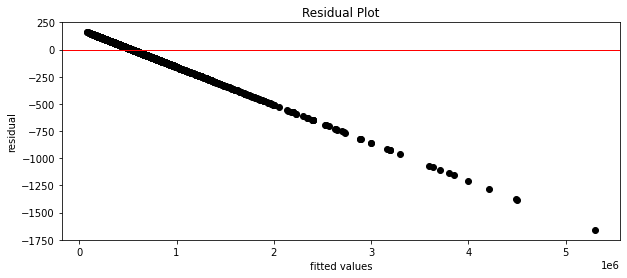

In [ ]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Performing the barlett's test
import scipy as sp
#
test_result, p_value = sp.stats.bartlett(y_pred.flatten(), np.array(list(y)))

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('The variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Therefore the variances are equal, meaning that the model is okay and does not have to be reassessed.')
  print('The variances are homogeneous')

The test result of 2.56 is less than the critical value of 5528.93
Therefore the variances are equal, meaning that the model is okay and does not have to be reassessed.
The variances are homogeneous


##### b) Ridge Regression.

In [ ]:
# Creating X and y variables
#
X = df1[['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = df1.price

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Training the model
#
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)

# Making predictions
#
y_pred = ridge.predict(X_test)

# Measuring the accuracy of the model
from sklearn.metrics import mean_squared_error
#
print(f'RMSE of Ridge: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Ridge: 158656.19305068816


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


##### c) Lasso Regression

In [ ]:
# Creating X and y variables
#
X = df1[['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = df1.price

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Training the model
#
lasso = Lasso(normalize=True)
lasso.fit(X_train, y_train)

# Making predictions
#
y_pred = lasso.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of Lasso: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Lasso: 130.31059315510257


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


##### d) Elastic Net

In [ ]:
# Creating X and y variables
#
X = df1[['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values
y = df1.price.values

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Training the model
#
elastic = ElasticNet(normalize=True)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of ElasticNet: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of ElasticNet: 373753.9205775834


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


##### e) Quantile Regression.

In [ ]:
# Visualizing the data
# Creating X and y variables
#
X = df1[[ 'sqft_living']]
y = df1.price

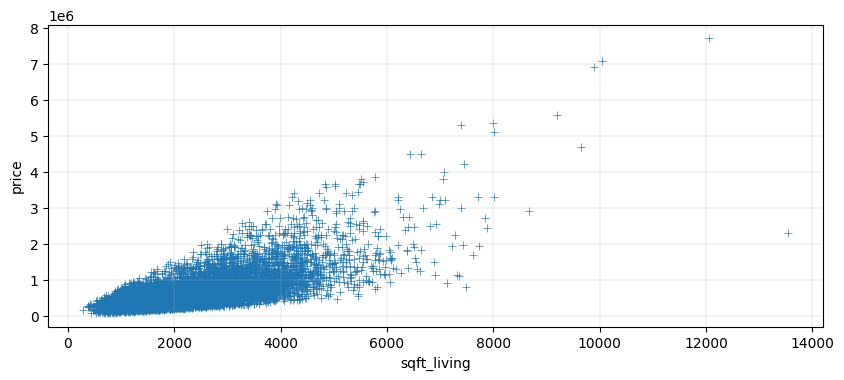

In [ ]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data=df1, x="sqft_living", y="price", marker='+')
plt.grid(linestyle='-', linewidth=0.2)

In [ ]:
# loading required library
from lightgbm import LGBMRegressor
# creating the model
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [ ]:
# loading the model into a dataframe
data = pd.DataFrame({'sqft_living': X_test.reset_index()['sqft_living'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'price': y_test.reset_index()['price']})
# reading the dataset
data.sort_values('sqft_living')

,sqft_living,0.1,0.5,0.9,price
4530,290,1.139489e+05,2.467673e+05,3.978311e+05,142000.0
221,370,1.139489e+05,2.467673e+05,3.978311e+05,276000.0
3465,440,1.139489e+05,2.467673e+05,3.978311e+05,290000.0
3285,470,1.139489e+05,2.467673e+05,3.978311e+05,192500.0
4996,490,1.139489e+05,2.467673e+05,3.978311e+05,150000.0
...,...,...,...,...,...
3133,7350,1.349849e+06,2.729850e+06,6.892174e+06,1110000.0
751,7390,1.349849e+06,2.729850e+06,6.892174e+06,5300000.0
2109,7440,1.349849e+06,2.729850e+06,6.892174e+06,4210000.0
3535,7480,1.349849e+06,2.729850e+06,6.892174e+06,800000.0


In [ ]:
comb_data = pd.melt(data, id_vars=['price'])
comb_data.head()

,price,variable,value
0,570000.0,sqft_living,1550.0
1,209977.0,sqft_living,1170.0
2,378000.0,sqft_living,1890.0
3,496700.0,sqft_living,1740.0
4,1860000.0,sqft_living,5570.0


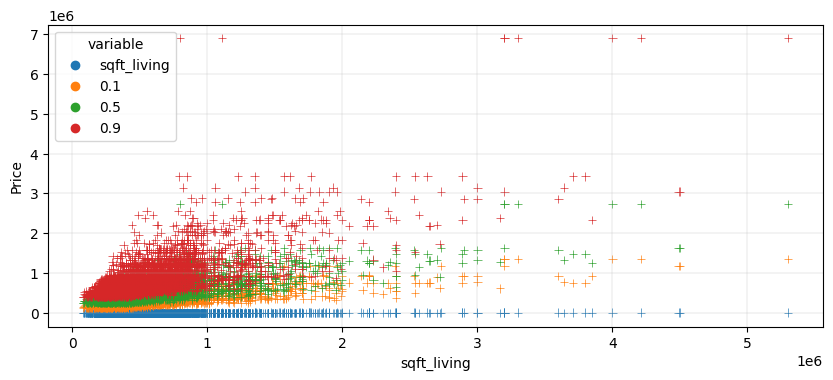

In [ ]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data=comb_data, 
                x="price",
                y='value',
                hue='variable',
                hue_order=['sqft_living', '0.1', '0.5', '0.9'],
                marker='+')
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("sqft_living")

In [ ]:
(data['sqft_living'] > data['0.1']).value_counts()

False    5402
dtype: int64

In [ ]:
(data['sqft_living'] > data['0.5']).value_counts()

False    5402
dtype: int64

In [ ]:
(data['sqft_living'] > data['0.9']).value_counts()

False    5402
dtype: int64

## Comparing the regressions

In [ ]:
lasso.coef_

array([278.519028])

In [ ]:
ridge.coef_

array([ 3.71693140e-01,  5.05898775e+01,  8.05226310e-02,  4.80403604e+01,
        4.87160619e+01, -2.94391860e+02,  2.52541942e+01, -2.08910030e+01,
        2.23728207e+05, -7.61086695e+04,  5.07439155e+01, -3.74251197e-04])

In [ ]:
elastic.coef_

array([ 1.23360304e-04,  3.43673025e-02,  1.15990768e-04,  3.26368123e-02,
        3.30748790e-02,  7.73052503e-02,  1.36575556e-02, -4.84501663e-02,
        9.96917236e+01,  7.39784268e+00,  3.82616301e-02,  1.46400629e-04])

In [ ]:
LR.coef_

array([ 1.00000000e+00,  1.07537313e-15, -1.08463961e-17,  1.58428068e-15,
       -5.14446822e-16,  9.88078185e-15, -1.07670145e-15,  1.71751630e-15,
        1.71067734e-12, -3.96061614e-12, -2.85696221e-15,  1.50339994e-17])

In [ ]:
# Creating a dataframe to campare the coefficients of the three models
# Top 20 of the most important features in predicting the rank of a team.
#
pd.DataFrame({'feature': X.columns, 
              'ridge_coeff': ridge.coef_, 
              'elastic_coeff': elastic.coef_,
              'LR_coeff': LR.coef_}
              )

,feature,ridge_coeff,elastic_coeff,LR_coeff
0,price,0.371693,0.000123,1.000000e+00
1,sqft_living,50.589878,0.034367,1.075373e-15
2,sqft_lot,0.080523,0.000116,-1.084640e-17
3,sqft_above,48.040360,0.032637,1.584281e-15
4,sqft_basement,48.716062,0.033075,-5.144468e-16
5,yr_built,-294.391860,0.077305,9.880782e-15
6,yr_renovated,25.254194,0.013658,-1.076701e-15
7,zipcode,-20.891003,-0.048450,1.717516e-15
8,lat,223728.206687,99.691724,1.710677e-12
9,long,-76108.669538,7.397843,-3.960616e-12


> Lasso regressing shrunk the coefficients of the features more than the ElasticNet Regression and Ridge Regression models